<a href="https://colab.research.google.com/github/guy998877/projects/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 7 - Classification
*Daniel Ohayon, 322404559*

*Guy Zagorski, 207812850*

In [ ]:
import json

api_token = {"username":"d4niel7","key":"82b6c74be6f0ab0950d09c78bc30b539"}

!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)


!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d shivam2503/diamonds
!unzip diamonds.zip

  0% 0.00/733k [00:00<?, ?B/s]
100% 733k/733k [00:00<00:00, 66.2MB/s]
Archive:  diamonds.zip
  inflating: diamonds.csv            


### Preperations

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("diamonds.csv")
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
df = df.drop("Unnamed: 0", axis=1) # redundant column
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### **ANSWER 1**

In [ ]:
features = ["carat", "depth", "table", "price", "x", "y"]
X = df[features]
y = df["clarity"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {metrics.f1_score(y_test, y_pred, average='micro')}") # can't use binary (default) average beacuse clairity isn't binary

Accuracy: 0.34529106414534666
F1 Score: 0.34529106414534666


### **ANSWER 2**

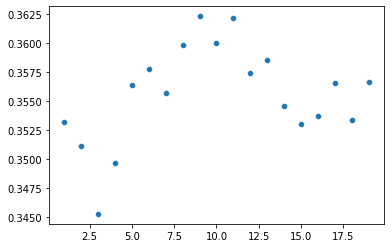

In [ ]:
keys = []
vals = []
for k in range(1,20):
  knn = KNeighborsClassifier(k)
  knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)
  acc = metrics.accuracy_score(y_test, y_pred)

  keys.append(k)
  vals.append(acc)

sns.scatterplot(x=keys, y=vals)

As we can see, the best accuracy is at k=9. But it still doesn't preform very well...


### **ANSWER 3**

In [ ]:
features = ["carat", "depth", "table", "price", "x", "y"]
X = df[features]
y = df["cut"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
for k in [1,3,5,7]:
  knn = KNeighborsClassifier(k)
  knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)
  print(f"[{k}] Accuracy: {metrics.accuracy_score(y_test, y_pred)}")

[1] Accuracy: 0.5631256952169077
[3] Accuracy: 0.5576566555431961
[5] Accuracy: 0.5647942157953282
[7] Accuracy: 0.5520949202817946


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print(f"[Decision Tree] Accuracy: {metrics.accuracy_score(y_test, y_pred)}")

[Decision Tree] Accuracy: 0.7117167222840193


As we can see, Decision tree is obviously a better choice while still not perfect, outpreforms the KNN model.

### **ANSWER 4**

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2)
train_df

,carat,cut,color,clarity,depth,table,price,x,y,z
36309,0.32,Ideal,H,VVS1,61.6,55.0,936,4.43,4.40,2.72
44937,0.59,Ideal,E,SI1,61.7,56.0,1633,5.35,5.45,3.33
16190,1.01,Premium,G,VVS2,61.9,60.0,6470,6.45,6.41,3.98
40684,0.50,Good,E,SI1,63.7,59.0,1155,5.07,5.01,3.21
21220,1.22,Ideal,H,VVS2,61.7,56.0,9366,6.83,6.87,4.23
...,...,...,...,...,...,...,...,...,...,...
46015,0.53,Premium,E,VS2,58.3,62.0,1727,5.31,5.26,3.08
32257,0.36,Very Good,E,VS2,62.1,59.0,789,4.55,4.59,2.84
5851,1.00,Good,I,SI1,63.8,58.0,3920,6.32,6.28,4.02
18492,1.10,Ideal,G,VS1,61.9,55.0,7528,6.59,6.63,4.09


In order to work with colums clarity and color, we need tol transform 
them to sets of int that each int represent one clarity or color.

In [ ]:
from sklearn import preprocessing
clarity_kinds = set(train_df['clarity'].values)

clarity_kinds

{'I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'}

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(list(clarity_kinds))



LabelEncoder()

In [ ]:
le.classes_

array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype='<U4')

In [ ]:
l = le.transform(df['clarity'].values)
l


array([3, 2, 4, ..., 2, 3, 3])

In [ ]:
df['clarity'] = l
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,3,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
colors = set(train_df['color'].values)
le2 = preprocessing.LabelEncoder()
le2.fit(list(colors))
l2 = le2.transform(df['color'].values)
df['color'] = l2
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,4,3,61.0,58.0,2757,6.15,6.12,3.74


After we convert to int , lets build the models

In [ ]:
features = ["carat", "depth", "table", "price", "x", "y","color","clarity"]
X = df[features]
y = df["cut"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

,carat,depth,table,price,x,y,color,clarity
18619,1.01,63.9,58.0,7597,6.31,6.36,1,4
31010,0.35,61.7,58.0,748,4.54,4.51,2,2
32275,0.30,60.7,58.0,789,4.34,4.36,3,6
17027,1.02,62.1,55.0,6797,6.50,6.46,4,7
24890,2.00,63.2,54.0,13320,7.97,7.88,4,2
...,...,...,...,...,...,...,...,...
7687,1.10,62.2,55.0,4275,6.62,6.65,6,2
14733,1.15,61.7,58.0,5932,6.69,6.76,0,2
6160,1.00,64.1,54.0,3991,6.30,6.33,4,3
16470,1.00,61.7,54.0,6580,6.42,6.39,2,5


In [ ]:
for k in [1,3,5,7]:
  knn = KNeighborsClassifier(k)
  knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)
  print(f"[{k}] Accuracy: {metrics.accuracy_score(y_test, y_pred)}")

[1] Accuracy: 0.5372636262513905
[3] Accuracy: 0.525027808676307
[5] Accuracy: 0.5343900630329996
[7] Accuracy: 0.5268817204301075


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print(f"[Decision Tree] Accuracy: {metrics.accuracy_score(y_test, y_pred)}")

[Decision Tree] Accuracy: 0.7122728958101594


We can see that the previous result of KNN was
[1] Accuracy: 0.5557100482017056
[3] Accuracy: 0.553299962921765
[5] Accuracy: 0.5569150908416759
[7] Accuracy: 0.5515387467556544

so, in model KNN there was a small decline in acuuracy

the previous decision tree question 3 accuracy was 0.7047645532072674,
so , we can see better accuracy in the decision tree in question 4 

### **ANSWER 5**

In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,4,3,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
features = ["carat", "depth", "table", "price", "x", "y","color","clarity"]
X = df[features]
y = df["cut"].values
train_size = [0.05,0.1,0.2,0.5,0.75,0.8,0.9]
dict_results = {}
for k in train_size :
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=k)
  knn = KNeighborsClassifier(5)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  dict_results[k] = metrics.accuracy_score(y_test, y_pred)
print(dict_results)


{0.05: 0.39691274905840795, 0.1: 0.4160795946112965, 0.2: 0.4582174638487208, 0.5: 0.5094920281794587, 0.75: 0.5324434556915091, 0.8: 0.5350389321468298, 0.9: 0.546347793845013}


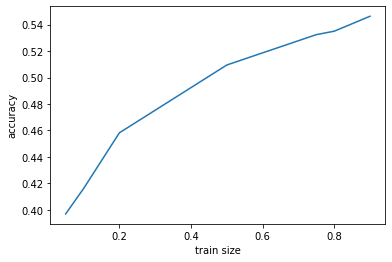

In [ ]:
import numpy as np
keys = list(dict_results.keys())
values = list(dict_results.values())

train_size = np.asarray(keys)
accuracy = np.asarray(values)

plt.plot(train_size, accuracy)
plt.xlabel('train size')
plt.ylabel('accuracy')
plt.show()

As we can see , there is a incline in accuracy over bigger train size.